## SpaceTime: Western Australia

<img src='../graphics/loop_sm.png'>
   
   

In [1]:
import ipywidgets as widgets
import os
import matplotlib.pyplot as plt


# load last saved map area and mdoe engine (if they exist)
if(not os.path.isdir('../scratch-ST/')):
    os.mkdir('../scratch-ST/')
if(not os.path.isdir('../scratch-ST/tmp')):
    os.mkdir('../scratch-ST/tmp')
if(os.path.isfile('../scratch-ST/last_choices.txt')):
    f=open('../scratch-ST/last_choices.txt','r')
    contents =f.readlines()
    f.close()
    default_map=contents[0].replace("\n","")
    default_engine=contents[1].replace("\n","")
else:
    default_map='Draw Your Own'
    default_engine='loopstructural'

options=['Draw Your Own','Last Area Drawn']

if(not default_map in options):
    default_map= options[0]

map_choice=widgets.Dropdown(
    options=options,
    value=default_map,
    description='Map area:',
    disabled=False,
)
display(map_choice)

Dropdown(description='Map area:', options=('Draw Your Own', 'Last Area Drawn'), value='Draw Your Own')

In [2]:
import folium
import pandas as pd
import json
import random
from shapely.geometry import Polygon
from ipyleaflet import Map, basemaps, GeoJSON, LayersControl, DrawControl,WMSLayer, GeoData
from ipywidgets import Label
from ipywidgets import Label
import ipywidgets as widgets
import geopandas as gpd

test_data_name=map_choice.value
print(test_data_name)
if(not test_data_name =='Draw Your Own' and not test_data_name =='Last Area Drawn'):
    test_data_path='../'+test_data_name+'/'

    os.chdir(test_data_path)
    print(os.getcwd())    
    %run -i "m2l_config.py"

if(not test_data_name =='Draw Your Own'):
    if(test_data_name=='Last Area Drawn'):
        last_coords=pd.read_csv('../scratch-ST/last_area.csv')
        display(last_coords)
        minx=last_coords.iloc[0]['minx']
        miny=last_coords.iloc[0]['miny']
        maxx=last_coords.iloc[0]['maxx']
        maxy=last_coords.iloc[0]['maxy']
        roi_poly=gpd.read_file('../scratch-ST/tmp/roi_poly.shp')
    elif(not test_data_name =='Draw Your Own'):
        y_point_list = [miny, miny, maxy, maxy, maxy]
        x_point_list = [minx, maxx, maxx, minx, minx]
        bbox_geom = Polygon(zip(x_point_list, y_point_list))
        polygon = gpd.GeoDataFrame(index=[0], crs=dst_crs, geometry=[bbox_geom])
        polygon_ll=polygon.to_crs(src_crs)

        minx=polygon_ll.total_bounds[0]
        maxx=polygon_ll.total_bounds[2]
        miny=polygon_ll.total_bounds[1]
        maxy=polygon_ll.total_bounds[3]

        minlong=minx
        maxlong=maxx
        minlat=miny
        maxlat=maxy
        #print("x",polygon_ll.total_bounds[0])
        st_bbox=[minlong,minlat,maxlong,maxlat]
        lat_point_list = [minlat, minlat, maxlat, maxlat,maxlat]
        lon_point_list = [minlong, maxlong, maxlong, minlong, minlong]
        bbox_geom = Polygon(zip(lon_point_list, lat_point_list))
        rect = gpd.GeoDataFrame(index=[0], crs=src_crs, geometry=[bbox_geom]) 

    
    src_crs = "epsg:4326"  # coordinate reference system for imported dtms (geodetic lat/long WGS84)
    dst_crs = "epsg:28350"  # coordinate reference system for imported dtms (geodetic lat/long WGS84)

    bbox2=str(minx)+","+str(miny)+","+str(maxx)+","+str(maxy)
    y_point_list = [miny, miny, maxy, maxy, maxy]
    x_point_list = [minx, maxx, maxx, minx, minx]
    bbox_geom = Polygon(zip(x_point_list, y_point_list))
    polygon = gpd.GeoDataFrame(index=[0], crs=dst_crs, geometry=[bbox_geom])
    polygon_ll=polygon.to_crs(src_crs)

    minlong=polygon_ll.total_bounds[0]
    maxlong=polygon_ll.total_bounds[2]
    minlat=polygon_ll.total_bounds[1]
    maxlat=polygon_ll.total_bounds[3]
    
    minlong=minx
    maxlong=maxx
    minlat=miny
    maxlat=maxy

    lat_point_list = [minlat, minlat, maxlat, maxlat,maxlat]
    lon_point_list = [minlong, maxlong, maxlong, minlong, minlong]
    bbox_geom = Polygon(zip(lon_point_list, lat_point_list))
    rect = gpd.GeoDataFrame(index=[0], crs=src_crs, geometry=[bbox_geom]) 

    example_rect = GeoData(geo_dataframe = rect,
                   style={'color': 'purple', 'opacity':3, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},                  
                   name = 'Example')
    
    if(test_data_name=='Last Area Drawn'):
        roi_poly=gpd.read_file('../scratch-ST/tmp/roi_poly.shp')
        example_rect = GeoData(geo_dataframe = roi_poly,
                   style={'color': 'purple', 'opacity':3, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},                  
                   name = 'Example')
        
    center=(minlat+((maxlat-minlat)/2),minlong+((maxlong-minlong)/2))
else:
    center=(-22.6,117.3)
    
wms_geol = WMSLayer(
    url='https://geo.loop-gis.org/geoserver/loop/wms?',
    layers='loop:2_5m_interpgeop15_4326',
    format='image/png',
    transparent=True,
    opacity=0.4,
    attribution='Geology data from GSWA',
    name='geology'

)
m =Map(basemap=basemaps.OpenTopoMap, center=center, zoom=8,scroll_wheel_zoom=True)
label = Label()
display(label)

def handle_interaction(**kwargs):
    if kwargs.get('type') == 'mousemove':
        label.value = str(kwargs.get('coordinates'))

m.on_interaction(handle_interaction)
m.add_layer(wms_geol)
if( not test_data_name =='Draw Your Own'):
    m.add_layer(example_rect)

    


m.add_control(LayersControl())
dc = DrawControl(rectangle={'shapeOptions': {'color': '#0000FF'}})
m.add_control(dc)
m

Draw Your Own


Label(value='')

Map(center=[-22.6, 117.3], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

## If you don't see a map above, please uncomment the next two lines of code
   
So they should look like this:   

!conda install -c conda-forge ipyleaflet -y   
!jupyter nbextension enable --py --sys-prefix ipyleaflet   


In [28]:
#!conda install -c conda-forge ipyleaflet -y
#!jupyter nbextension enable --py --sys-prefix ipyleaflet


## Load config file

In [29]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import sys
import stat
import functools 
import operator  
import matplotlib
import networkx as nx
import rasterio
from matplotlib import pyplot
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from map2loop import m2l_utils
from map2loop import m2l_topology
from map2loop import m2l_geometry
from map2loop import m2l_interpolation
from map2loop import m2l_export
from map2loop import m2l_map_checker
import time
import shutil
%matplotlib inline
t0 = time.time()

if(test_data_name=='Draw Your Own' or test_data_name=='Last Area Drawn'):
    if(test_data_name=='Draw Your Own'):
        new_poly=GeoJSON(data=dc.last_draw)
        old_poly=str(new_poly)

        if("'geometry': None" in old_poly):
            raise NameError('map2loop error: No rectangle selected')
        old_poly=old_poly.rsplit("'coordinates': ", 1)[1]
        old_poly=old_poly.replace('[[[','').replace('[','').replace(']]]}})','').replace('],','').replace(',','').split(" ")
        longs=old_poly[0::2]
        lats=old_poly[1::2]
        minlong=float(min(longs))
        maxlong=float(max(longs))
        minlat=float(max(lats)) #ignores sign
        maxlat=float(min(lats)) #ignores sign
        
    bounds=(minlong,maxlong,minlat,maxlat)
    src_crs = "epsg:4326"  # coordinate reference system for imported dtms (geodetic lat/long WGS84)
    dst_crs = "epsg:28350" # coordinate system for example data

    if(test_data_name=='Draw Your Own'):    
        flat_list=[item for sublist in new_poly.data['geometry']['coordinates'] for item in sublist]
        flat_list=[item for sublist in flat_list for item in sublist]
        longs=flat_list[0::2]
        lats=flat_list[1::2]
        #display(lats,longs)
        poly_geom = Polygon(zip(longs, lats))
        roi_poly = gpd.GeoDataFrame(index=[0], crs=src_crs, geometry=[poly_geom]) 
    roi_poly.to_file('../scratch-ST/tmp/roi_poly.shp')
    roi_poly=roi_poly.to_crs(dst_crs)
    lat_point_list = [minlat, minlat, maxlat, maxlat,maxlat]
    lon_point_list = [minlong, maxlong, maxlong, minlong, minlong]
    #display(lat_point_list,lon_point_list)
    bbox_geom = Polygon(zip(lon_point_list, lat_point_list))
    mbbox = gpd.GeoDataFrame(index=[0], crs=src_crs, geometry=[bbox_geom]) 
    bbox=mbbox.total_bounds
    gp_bbox=[bbox[0],bbox[1],bbox[2],bbox[3]]

    print(src_crs,mbbox.total_bounds)
    mbbox=mbbox.to_crs(dst_crs)
    print(dst_crs,mbbox.total_bounds)
    
    f=open('../scratch-ST/last_area.csv','w') 
    ostr='minx,miny,maxx,maxy\n'
    f.write(ostr)
    ostr=str(minlong)+','+str(minlat)+','+str(maxlong)+','+str(maxlat)+'\n'
    f.write(ostr)
    f.close()

workflow={'model_engine':'loopstructural'} 
# save last map and engine choices
f=open('../scratch-ST/last_choices.txt','w') 
ostr=str(map_choice.value)+'\n'+'loopstructural'+'\n'
f.write(ostr)
f.close()   

if(test_data_name=='Draw Your Own' or test_data_name=='Last Area Drawn' ):
    test_data_path='../scratch-ST/'
    minx=mbbox.total_bounds[0]
    maxx=mbbox.total_bounds[2]
    miny=mbbox.total_bounds[1]
    maxy=mbbox.total_bounds[3]
    
    bbox2=str(minx)+","+str(miny)+","+str(maxx)+","+str(maxy)

    os.chdir('../source_data/')
    %run -i "m2l_config_remote.py"
    #%run -i "m2l_config_remote.py"
    print(os.getcwd())
    
else:
    test_data_path='../'+test_data_name+'/'




lat_point_list = [miny, miny, maxy, maxy, maxy]
lon_point_list = [minx, maxx, maxx, minx, minx]
bbox_geom = Polygon(zip(lon_point_list, lat_point_list))
polygon = gpd.GeoDataFrame(index=[0], crs=dst_crs, geometry=[bbox_geom]) 
bbox=(minx,miny,maxx,maxy)

# opportunity to second guess config file or add extra parameters not yet in config file...

fold_decimate=2         

fault_decimate=0

contact_decimate=5

orientation_decimate=0

use_interpolations=True       #use interpolated dips/contacts as additional constraints

use_fat=True                   #use fold axial trace orientation hints

pluton_form='domes'

fault_dip=90

min_fault_length=5000

compute_etc=False

#spacing > 0 gives absolute spacing, spacing <0 gives # of grid points in x direction
spacing=-200

#spacing=500   #grid spacing in metres of interpolation points

Australia=True

drift_prefix=['None']

#################################
# There are many alternative datasets that 
# can be extracted from the input data, 
# and many choices of possible input data
#
# These flags define what the actual workflow 
# will be for this experiment, based partly 
# on which (if any) modelling engine is used
#
#############################################
#workflow={'model_engine':engine_choice.value} 

if(workflow['model_engine']=='geomodeller'):
    workflow.update( {'seismic_section':False,
          'cover_map':False,
          'near_fault_interpolations':True,
          'fold_axial_traces':False,
          'stereonets':True,
          'formation_thickness':True,
          'polarity':False,
          'strat_offset':True,
          'contact_dips':True} )
elif(workflow['model_engine']=='loopstructural'):
    workflow.update( {'seismic_section':False,
          'cover_map':False,
          'near_fault_interpolations':False,
          'fold_axial_traces':True,
          'stereonets':True,
          'formation_thickness':True,
          'polarity':False,
          'strat_offset':True,
          'contact_dips':True} )
elif(workflow['model_engine']=='gempy'):
    workflow.update( {'seismic_section':False,
          'cover_map':False,
          'near_fault_interpolations':False,
          'fold_axial_traces':True,
          'stereonets':False,
          'formation_thickness':False,
          'polarity':False,
          'strat_offset':False,
          'contact_dips':False} )
elif(workflow['model_engine']=='noddy'):
    workflow.update( {'seismic_section':False,
          'cover_map':False,
          'near_fault_interpolations':False,
          'fold_axial_traces':False,
          'stereonets':False,
          'formation_thickness':False,
          'polarity':False,
          'strat_offset':False,
          'contact_dips':False} )
else:
    workflow.update( {'seismic_section':False,
          'cover_map':False,
          'near_fault_interpolations':False,
          'fold_axial_traces':False,
          'stereonets':True,
          'formation_thickness':True,
          'polarity':False,
          'strat_offset':True,
          'contact_dips':False} )
    


# no cover info so no need load cover layers
if(not workflow['cover_map']):
    dtb=0
    dtb_null=0
else:
    dtb_grid=data_path+'young_cover_grid.tif' #obviously hard-wired for the moment
    dtb_null='-2147483648' #obviously hard-wired for the moment
    cover_map_path=data_path+'Young_Cover_FDS_MGA_clean.shp' #obviously hard-wired for the moment
    dtb_clip=output_path+'young_cover_grid_clip.tif' #obviously hard-wired for the moment
    cover_dip=10 # dip of cover away from contact
    cover_spacing=5000 # of contact grid in metres

loopwfs=m2l_utils.have_access("geo.loop-gis.org")
ga=m2l_utils.have_access("services.ga.gov.au")

if(not local_paths and not loopwfs):
    raise NameError('map2loop error: No access to remote map server')

if(not (loopwfs & ga)):
    local_paths=True
    net=False
    print('using local paths')
else:
    net=True

structure_file,geology_file,fault_file,mindep_file,fold_file,c_l=m2l_map_checker.check_map(structure_file,geology_file,fault_file,mindep_file,fold_file,tmp_path,bbox,c_l,dst_crs,local_paths,drift_prefix,roi_poly)


epsg:4326 [120.843472 -23.05653  122.831201 -20.525023]
epsg:28350 [ 893926.87797092 7438275.28145283 1108724.21086302 7725698.12699096]
Default parameters loaded from ../scratch-ST/m2l_config_remote.py:
#ROI

step_out=0.1   #padding arounf dtm to ensure reprojected dtm covers target area (in degrees)
inset=0      #unused??

#
#minx=500057  #region of interest coordinates in metre-based system (or non-degree system)
#maxx=603028
#miny=7455348
#maxy=7567953
model_top=1200
model_base=-3200

#PATHS

local_paths=False       #flag to use local or WFS source for data inputs (True = local)


data_path=''
clut_path='../source_data/500kibg_colours.csv'
#clut_path=''
#geology_file='hams2_geol.shp'   #input geology file (if local)
#fault_file='GEOS_GEOLOGY_LINEARSTRUCTURE_500K_GSD.shp' #input fault file (if local)
#structure_file='hams2_structure.shp' #input bedding orientation file (if local)
#mindep_file='mindeps_2018.shp' #input mineral deposit file (if local)

structure_file='http://geo.loop-

available: geo.loop-gis.org
available: services.ga.gov.au

 orientations layer  metadata
--------------------
    bbox [ 894162.5191573  7439545.56465446 1106650.58528918 7718114.91318647]
    CRS None
    # items 4500
    Data types ['Point']

 geology layer  metadata
--------------------
    bbox [ 414055.25822971 7245963.05592659 1544819.13436156 7965117.21455235]
    CRS None
    # items 661
    Data types ['MultiPolygon']


C:\Users\00073294\Anaconda3\envs\loop\lib\site-packages\geopandas\geoseries.py:411: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


map2loop warning: Fault_17151_0 is one of a set of duplicates, so renumbering
map2loop warning: Fault_17151_1 is one of a set of duplicates, so renumbering
map2loop warning: Fault_5613_0 is one of a set of duplicates, so renumbering
map2loop warning: Fault_5613_1 is one of a set of duplicates, so renumbering
map2loop warning: Fault_5613_2 is one of a set of duplicates, so renumbering
map2loop warning: Fault_16419_0 is one of a set of duplicates, so renumbering
map2loop warning: Fault_16419_1 is one of a set of duplicates, so renumbering

 fold layer  metadata
--------------------
    bbox [ 901458.50656753 7442712.67003882 1096521.45539974 7724661.01661195]
    CRS None
    # items 747
    Data types ['LineString', 'MultiLineString']


C:\Users\00073294\Anaconda3\envs\loop\lib\site-packages\geopandas\geoseries.py:411: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


map2loop warning: Fault_17151_0 is one of a set of duplicates, so renumbering
map2loop warning: Fault_17151_1 is one of a set of duplicates, so renumbering
map2loop warning: Fault_5613_0 is one of a set of duplicates, so renumbering
map2loop warning: Fault_5613_1 is one of a set of duplicates, so renumbering
map2loop warning: Fault_5613_2 is one of a set of duplicates, so renumbering
map2loop warning: Fault_16419_0 is one of a set of duplicates, so renumbering
map2loop warning: Fault_16419_1 is one of a set of duplicates, so renumbering

 fault layer  metadata
--------------------
    bbox [ 905422.12663954 7442712.67003882 1096521.45539974 7724661.01661195]
    CRS epsg:28350
    # items 624
    Data types ['LineString']

 mindeps layer  metadata
--------------------
    bbox [ 894568.07711361 7444864.0824011  1100509.15444977 7714983.42094895]
    CRS None
    # items 673
    Data types ['Point']

Warnings:
     655 NaN/blank found in column "supersuite" of geology file, replacing wi

c:\users\00073294\dropbox\1_jupyter_notebooks\map2loop\map2loop\m2l_map_checker.py:310: UserWarning: The warnings listed above were issued
  warnings.warn('The warnings listed above were issued')
c:\users\00073294\dropbox\1_jupyter_notebooks\map2loop\map2loop\m2l_map_checker.py:343: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:28350

  geol_clip=gpd.overlay(geology, polygo, how='intersection')



No errors found, clipped and updated files saved to tmp


## Space-Time Information (WA only for the moment)

893926.8779709183,7438275.281452829,1108724.2108630175,7725698.126990957


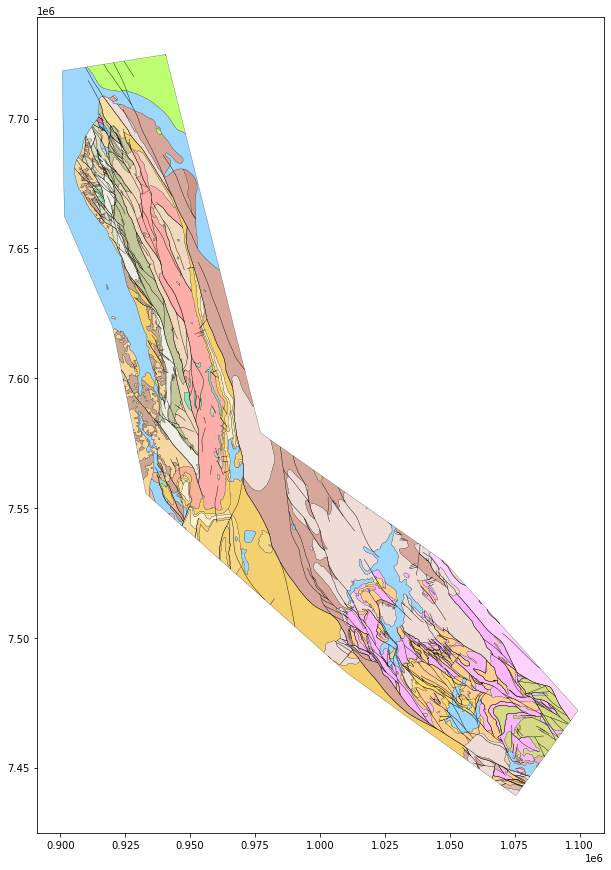

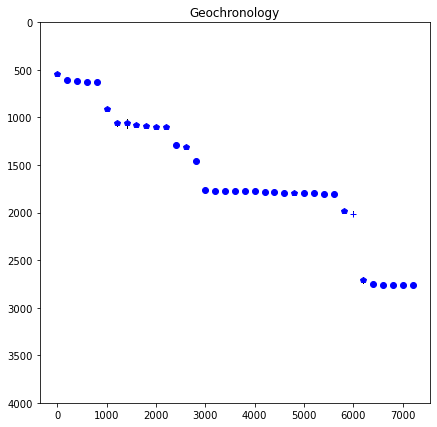

parents= 21 codes= 42


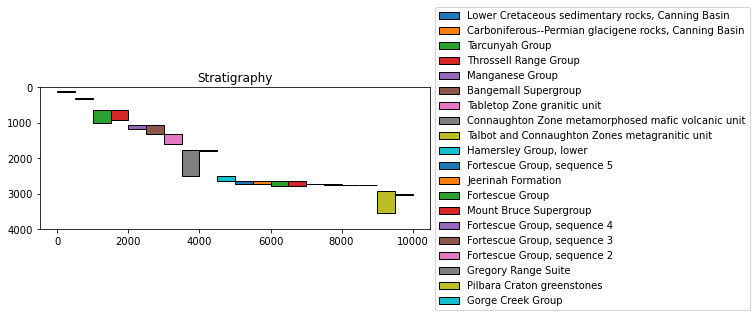

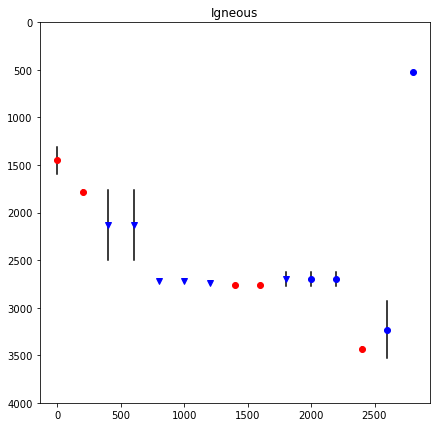

Reading file fault.txt
Read 12453 nodes
Hello


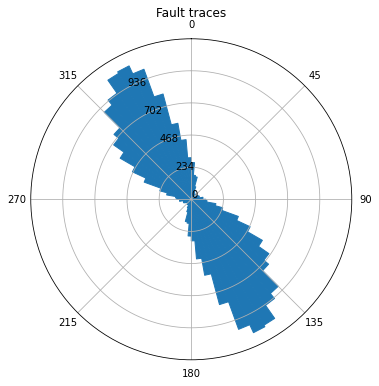

Reading file fold.txt
Read   856 nodes
Hello


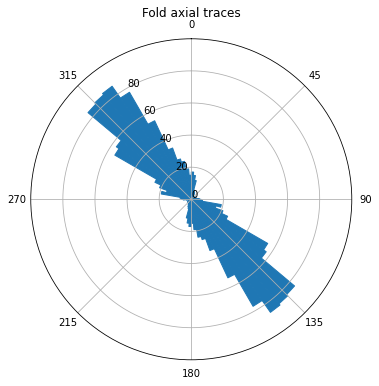

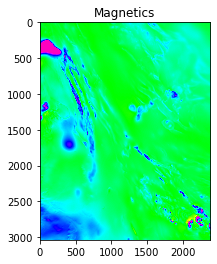

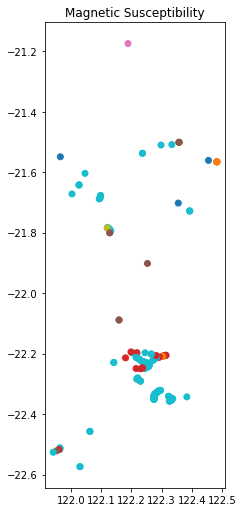

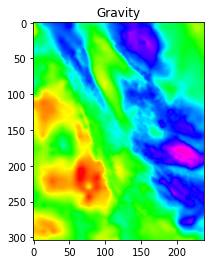

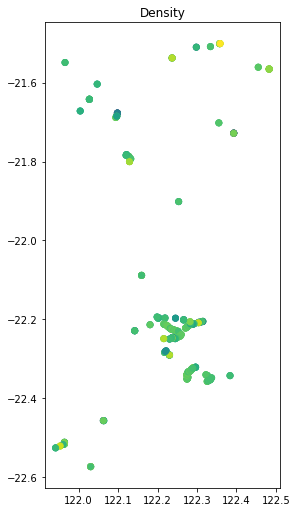

120.67648741634929 123.0347346183028 -23.21752249813847 -20.36958514310801
Attempt: 0 dtm geotif saved as ../scratch-ST/dtm/dtm.tif

reprojected dtm geotif saved as ../scratch-ST/dtm/dtm_rp.tif


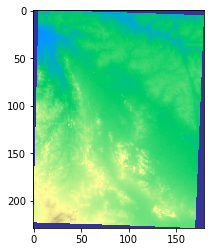

All observations n= 4500
groups ['Gregory Range Suite' 'Talbot and Connaughton Zones metagranitic unit'
 'Gorge Creek Group' 'Fortescue Group' 'Tabletop Zone granitic unit'
 'Davis Dolerite' 'Tambina Supersuite' 'Talbot Zone metasedimentary unit'
 'Throssell Range Group' 'Manganese Group' 'Yandagooge Formation'
 'Pinjian Chert Breccia' 'Hamersley Group' 'Paterson Formation'
 'Connaughtone Zone metamorphosed ultramafic unit'
 'Pilbara Craton greenstones'
 'Connaughton Zone metamorphosed mafic volcanic unit' 'Callawa Formation'
 'Tarcunyah Group' 'Isdell Formation' 'Lamil Group'] 
codes ['Gregory Range Suite' 'Talbot and Connaughton Zones metagranitic unit'
 'Cleaverville Formation' 'Hardey Formation' 'Kylena Formation'
 'Maddina Formation' 'Tumbiana Formation' 'Fortescue Group'
 'Tabletop Zone granitic unit' 'Davis Dolerite' 'Tambina Supersuite'
 'Talbot Zone metasedimentary unit' 'Broadhurst Formation'
 'Manganese Group' 'Yandagooge Formation' 'Pinjian Chert Breccia'
 'Coolbro Sandston

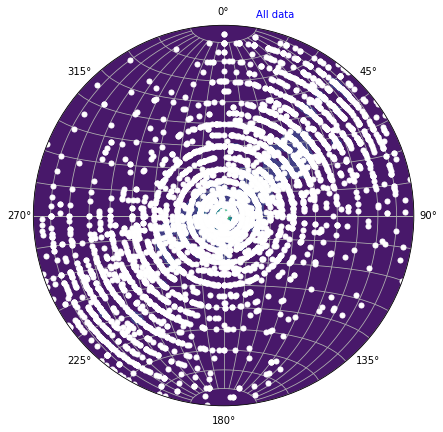

----------------------------------------------------------------------------------------------------------------------
Gregory Range Suite observations n= 6
strike/dip of girdle 227.6799987735693 / 76.80109051903506


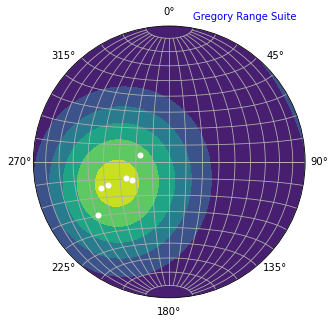

----------------------------------------------------------------------------------------------------------------------
Talbot and Connaughton Zones metagranitic unit observations n= 17
strike/dip of girdle 282.9517317468909 / 57.22269949002675


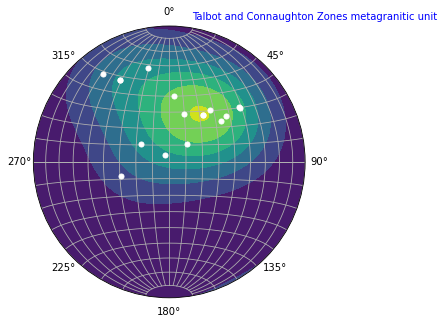

----------------------------------------------------------------------------------------------------------------------
Gorge Creek Group observations n= 15
strike/dip of girdle 234.57380490669362 / 84.97989768107216


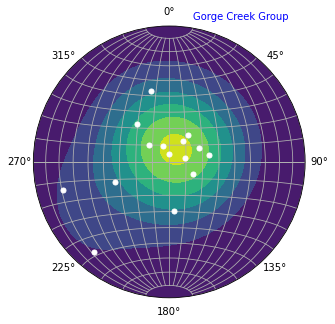

----------------------------------------------------------------------------------------------------------------------
Fortescue Group observations n= 300
strike/dip of girdle 61.009355274738084 / 84.37121551653631


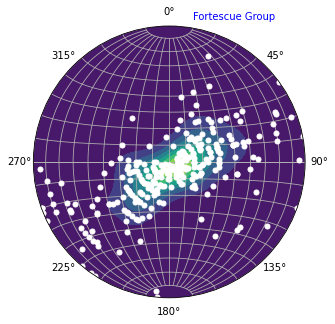

----------------------------------------------------------------------------------------------------------------------
Tabletop Zone granitic unit observations has no observations
----------------------------------------------------------------------------------------------------------------------
Davis Dolerite observations has 1 observation
----------------------------------------------------------------------------------------------------------------------
Tambina Supersuite observations n= 2
strike/dip of girdle 273.6921653750215 / 71.3674799825879


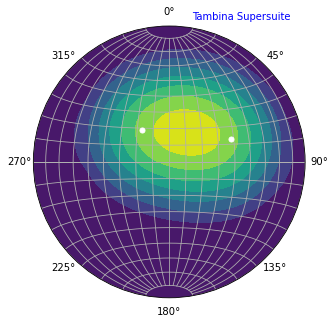

----------------------------------------------------------------------------------------------------------------------
Talbot Zone metasedimentary unit observations n= 26
strike/dip of girdle 221.8874425266206 / 84.72164036551511


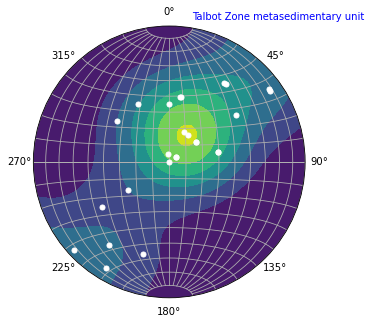

----------------------------------------------------------------------------------------------------------------------
Throssell Range Group observations n= 1893
strike/dip of girdle 226.58348880931192 / 86.49429854926053


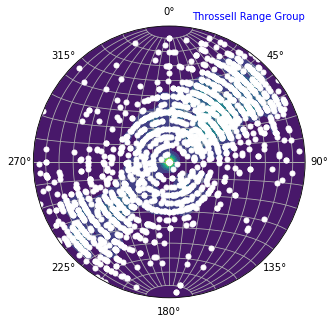

----------------------------------------------------------------------------------------------------------------------
Manganese Group observations n= 24
strike/dip of girdle 223.62824221172485 / 81.73476407833199


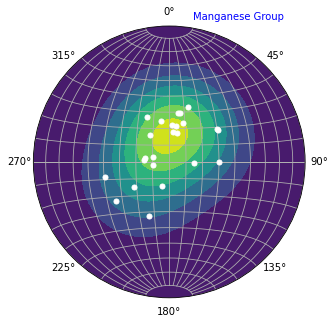

----------------------------------------------------------------------------------------------------------------------
Yandagooge Formation observations has 1 observation
----------------------------------------------------------------------------------------------------------------------
Pinjian Chert Breccia observations n= 14
strike/dip of girdle 231.42124945670946 / 89.84548687914449


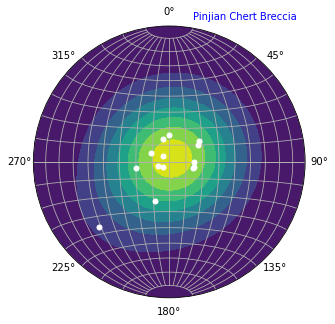

----------------------------------------------------------------------------------------------------------------------
Hamersley Group observations n= 127
strike/dip of girdle 56.52797268718189 / 88.86215295612439


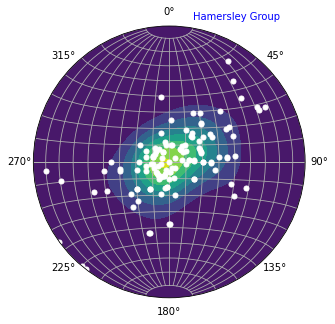

----------------------------------------------------------------------------------------------------------------------
Paterson Formation observations n= 131
strike/dip of girdle 231.59395488267904 / 89.40550208389867


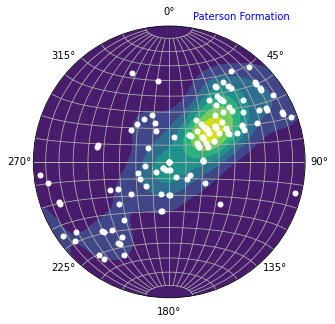

----------------------------------------------------------------------------------------------------------------------
Connaughtone Zone metamorphosed ultramafic unit observations has no observations
----------------------------------------------------------------------------------------------------------------------
Pilbara Craton greenstones observations n= 4
strike/dip of girdle 212.29835831107647 / 67.71147851055488


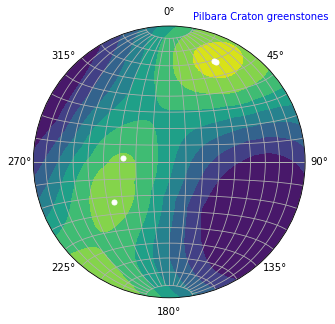

----------------------------------------------------------------------------------------------------------------------
Connaughton Zone metamorphosed mafic volcanic unit observations n= 5
strike/dip of girdle 216.50704943838116 / 63.59518764389282


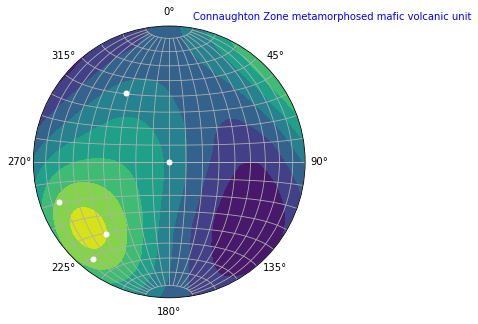

----------------------------------------------------------------------------------------------------------------------
Callawa Formation observations n= 5
strike/dip of girdle 121.1858219203148 / 85.55031621148714


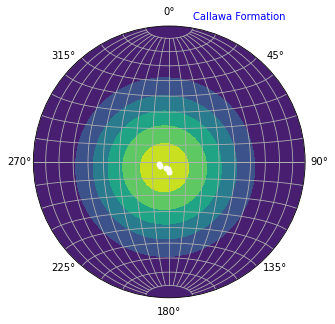

----------------------------------------------------------------------------------------------------------------------
Tarcunyah Group observations n= 461
strike/dip of girdle 242.62032881199002 / 89.05880218927122


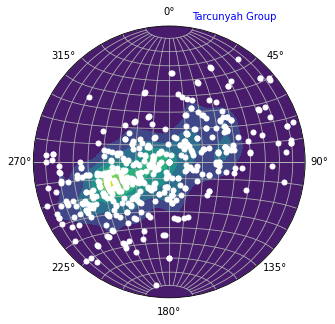

----------------------------------------------------------------------------------------------------------------------
Isdell Formation observations has no observations
----------------------------------------------------------------------------------------------------------------------
Lamil Group observations has no observations


In [30]:
import SpaceTime as st
import matplotlib.colors as colors

clut_path ='../source_data/500kibg_colours.csv'
geol_clip = gpd.read_file(tmp_path+'geol_clip.shp')
fault_clip = gpd.read_file(tmp_path+'faults_clip.shp')
if(clut_path ==''):
    geol_clip.plot(column=c_l['c'],figsize=(10,10),edgecolor='#000000',linewidth=0.2,)
    use_cmap=False
    cmap=0
else:
    use_cmap=True
    asc=pd.read_csv(clut_path)
    colours = [] #container for the discrete colours we are using
    i=0
    geol_clip['colour_index'] = np.nan #initialise a colour index attribute column
    geol_clip['new_code']=geol_clip['code'].str.replace("-","_")
    all_units=geol_clip['new_code'].unique()
    for ind,strat in asc.iterrows():
        if(strat['code'] in all_units):
            geol_clip.loc[geol_clip['new_code']==strat['code'],'colour_index'] = i
            colours.append(strat['colour'])
            i=i+1
    cmap = colors.ListedColormap(colours) # create a cmap for passing to geopandas
    fig, ax = matplotlib.pyplot.subplots(figsize=(15, 15))
    geol_clip.plot(ax=ax,column='colour_index',figsize=(10,10),edgecolor='#000000',linewidth=0.2,cmap=cmap)
    fault_clip.plot(ax=ax,figsize=(10,10),edgecolor='#000000',linewidth=.4)

    
ll_box='{},{},{},{}'.format(gp_bbox[0],gp_bbox[1],gp_bbox[2],gp_bbox[3])
geochron_filename='http://geo.loop-gis.org/geoserver/GSWA/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=GSWA:gswa_geochron&bbox={}&srs=epsg:28350'
density_filename='http://geo.loop-gis.org/geoserver/GA/wfs?service=WFS&version=1.0.0&request=GetFeature&typeName=GA:bulkdensitypoint_4283&bbox={}&srs=epsg:28350'
mag_sus_filename='http://geo.loop-gis.org/geoserver/GA/wfs?service=WFS&version=1.0.0&request=GetFeature&typeName=GA:magneticsusceptibility_4283&bbox={}&srs=epsg:28350'
eggs_filename='http://geo.loop-gis.org/geoserver/GA/wfs?service=WFS&version=1.0.0&request=GetFeature&typeName=GA:boreholedepthagespoint_4283b&bbox={}&srs=epsg:28350'
mag_netcdf_path ="http://dapds00.nci.org.au/thredds/dodsC/rr2/national_geophysical_compilations/magmap_v6_2015_VRTP/magmap_v6_2015_VRTP.nc"
grav_netcdf_path = "http://dapds00.nci.org.au/thredds/dodsC/rr2/national_geophysical_compilations/IR_gravity_anomaly_Australia_V1/IR_gravity_anomaly_Australia_V1.nc"
orogenic_filename='http://geo.loop-gis.org/geoserver/GSWA/wfs?service=WFS&version=1.0.0&request=GetFeature&typeName=GSWA:500k_orogenic_event&bbox={}&srs=epsg:28350'

SpaceTime=True
if(SpaceTime):
    st_bbox=str(minx)+","+str(miny)+","+str(maxx)+","+str(maxy)
    print(st_bbox)
    st.plot_geochron(geochron_filename,ll_box)
    st.plot_geology_parents(geology_file,st_bbox)
    st.plot_orogenic(orogenic_filename,st_bbox)
    st.plot_plutons(geology_file,st_bbox)     
    st.plot_faults(fault_file,gp_bbox)
    st.plot_folds(fold_file,gp_bbox)
    st.plot_mag(mag_netcdf_path,tmp_path+'mag.csv',gp_bbox)
    st.plot_mag_sus(mag_sus_filename,ll_box)
    st.plot_grav(grav_netcdf_path,tmp_path+'grav.csv',gp_bbox)
    st.plot_density(density_filename,ll_box)
    
    polygon_ll=polygon.to_crs(src_crs)

    minlong=polygon_ll.total_bounds[0]-step_out
    maxlong=polygon_ll.total_bounds[2]+step_out
    minlat=polygon_ll.total_bounds[1]-step_out
    maxlat=polygon_ll.total_bounds[3]+step_out

    print(minlong,maxlong,minlat,maxlat)
    downloaded = False
    i=0
    print('Attempt: 0 ',end='')
    while downloaded == False:
        try:
            m2l_utils.get_dtm(dtm_file, minlong,maxlong,minlat,maxlat)
            downloaded=True
        except:
            time.sleep(10)
            i=i+1
            print(' ',i,end='')
    if(i==100):
        raise NameError('map2loop error: Could not access DTM server after 100 attempts')
    print()

    geom_rp=m2l_utils.reproject_dtm(dtm_file,dtm_reproj_file,src_crs,dst_crs)

    dtm = rasterio.open(dtm_reproj_file)
    pyplot.imshow(dtm.read(1), cmap='terrain',vmin=0,vmax=1000)
    pyplot.show()

    geology = gpd.read_file(geology_file,bbox=bbox)

    geology[c_l['g']].fillna(geology[c_l['g2']], inplace=True)
    geology[c_l['g']].fillna(geology[c_l['c']], inplace=True)

    orientations = gpd.read_file(structure_file,bbox=bbox)

    if(len(orientations)<2):
        raise NameError('Not enough orientations to complete calculations (need at least 2)')
    group_girdle=m2l_utils.plot_bedding_stereonets(orientations,geology,c_l)

In [31]:
print(geology_file)
geology_ll = gpd.read_file(geology_file,bbox=bbox)

geology_ll[c_l['g']].fillna(geology_ll[c_l['g2']], inplace=True)
geology_ll[c_l['g']].fillna(geology_ll[c_l['c']], inplace=True)


../scratch-ST/tmp/geol_clip.shp


## Save geology to file as WKT

In [32]:
hint_flag=False # use GSWA strat database to provide relative age hints
def unique_list(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    return(list(list_set)) 
list1=['geometry', c_l['o'],c_l['c'],c_l['g'],c_l['u'],c_l['min'],c_l['max'],c_l['ds'],c_l['r1'],c_l['r2']]
list2=unique_list(list1)

sub_geol = geology_ll[list2]
m2l_topology.save_geol_wkt(sub_geol,geology_file_csv, c_l,hint_flag)

420  polygons


## Save mineral deposits to file as WKT
This is not needed by map2loop to build 3D models, but is used by map2model to calculate mineral deposit/topology analyses.

673  points


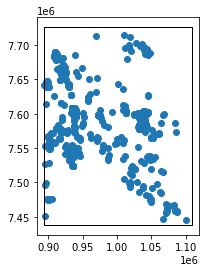

In [33]:
mindep = gpd.read_file(mindep_file,bbox=bbox)

sub_mindep = mindep[['geometry', c_l['msc'],c_l['msn'],c_l['mst'],c_l['mtc'],c_l['mscm'],c_l['mcom']]]
m2l_topology.save_mindep_wkt(sub_mindep,mindep_file_csv, c_l)

base=sub_mindep.plot()
polygon.plot(ax=base, color='none',edgecolor='black')


## Read and save orientations data point data as WKT

4500  points


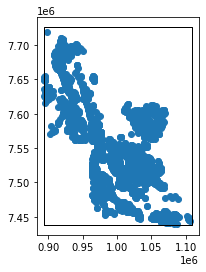

In [34]:
orientations = gpd.read_file(structure_file,bbox=bbox)

sub_pts = orientations[['geometry', c_l['gi'],c_l['d'],c_l['dd']]]

m2l_topology.save_structure_wkt(sub_pts,structure_file_csv,c_l)

base=sub_pts.plot()
polygon.plot(ax=base, color='none',edgecolor='black')


## Plot faults and bounding box

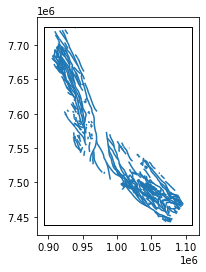

In [35]:
if(os.path.exists(fault_file)):
    lines_ll=gpd.read_file(fault_file,bbox=bbox)

    sub_lines = lines_ll[['geometry', c_l['o'],c_l['f']]]
    base=sub_lines.plot()
    polygon.plot(ax=base, color='none',edgecolor='black')
else:
    sub_lines=[]


## Save faults to file as WKT

In [36]:
m2l_topology.save_faults_wkt(sub_lines,fault_file_csv,c_l)

440  polylines


## Create map2model input file

In [37]:
m2l_topology.save_Parfile(m2m_cpp_path,c_l,graph_path,geology_file_csv,fault_file_csv,structure_file_csv,mindep_file_csv,minx,maxx,miny,maxy,500.0,'Fe,Cu,Au,NONE',2)


## Calculate topology

In [38]:
import subprocess
import platform
os.chdir(m2m_cpp_path)
print(os.getcwd())
#%system map2model.exe Parfile
if(platform.system()=='Windows'):
    subprocess.run(["map2model.exe", "Parfile"])
else:
    subprocess.run(["./map2model", "Parfile"])

C:\Users\00073294\Dropbox\1_Jupyter_notebooks\map2loop\m2m_cpp


## Simple network graph of the geology with legend   
If in Australia we can use data derived from the ASUD database to refine stratigraphic relationshipsle network graph of the geology with legend

In [39]:
if(Australia):
    asud_strat_file='../source_data/ASUD.csv'
    m2l_topology.use_asud(strat_graph_file, asud_strat_file,graph_path)
    strat_graph_file=graph_path+'ASUD_strat.gml'


0    'Callawa Formation', 'anchor': 'n', 'fontStyle': 'bold'
1    'Connaughton Zone metamorphosed mafic volcanic unit', 'anchor': 'n', 'fontStyle': 'bold'
2    'Connaughtone Zone metamorphosed ultramafic unit', 'anchor': 'n', 'fontStyle': 'bold'
3    'Davis Dolerite', 'anchor': 'n', 'fontStyle': 'bold'
4    'Fortescue Group', 'anchor': 'n', 'fontStyle': 'bold'
5    'Gorge Creek Group', 'anchor': 'n', 'fontStyle': 'bold'
6    'Gregory Range Suite', 'anchor': 'n', 'fontStyle': 'bold'
7    'Hamersley Group', 'anchor': 'n', 'fontStyle': 'bold'
8    'Isdell Formation', 'anchor': 'n', 'fontStyle': 'bold'
9    'Lamil Group', 'anchor': 'n', 'fontStyle': 'bold'
10    'Manganese Group', 'anchor': 'n', 'fontStyle': 'bold'
11    'Paterson Formation', 'anchor': 'n', 'fontStyle': 'bold'
12    'Pilbara Craton greenstones', 'anchor': 'n', 'fontStyle': 'bold'
13    'Pinjian Chert Breccia', 'anchor': 'n', 'fontStyle': 'bold'
14    'Tabletop Zone granitic unit', 'anchor': 'n', 'fontStyle': 'bold'
15    '

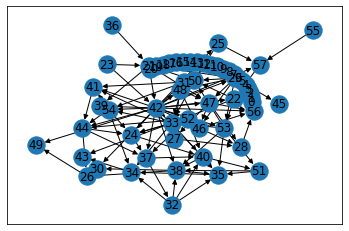

In [40]:
G=nx.read_gml(strat_graph_file,label='id')
selected_nodes = [n for n,v in G.nodes(data=True) if n >=0]
nx.draw_networkx(G, pos=nx.kamada_kawai_layout(G), arrows=True, nodelist=selected_nodes)

nlist=list(G.nodes.data('LabelGraphics'))
nlist.sort()
for no in nlist:
    if(no[0]>=0):
        elem=str(no[1]).replace("{'text':","").replace(", 'fontSize': 14}","")
        #second=elem.split(":").replace("'","")
        print(no[0]," ",elem)